# Table of Contents
## 1 Import Libraries 
## 2 Import data set 
## 3 Elbow Technique 
## 4 K-means clustering 
## 5 Descriptive Statistics

# 1 Import data set

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os 
import sklearn 
from sklearn.cluster import KMeans 
import pylab as pl

In [3]:
path = r'C:\Users\ctede\OneDrive\Desktop\World University Rankings Analysis'

#Times data set
Times = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','Times_new_cols.pkl'))

In [4]:
Times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,Median_Score,Score_Category,region
0,1,Harvard University,United States of America,99.7,72,98.7,98.8,34,96,20152,8.9,25,NaN,2011,98.70,Over 80,North America
1,2,California Institute of Technology,United States of America,97.7,54,98.0,99.9,83,96,2243,6.9,27,33 : 67,2011,97.70,Over 80,North America
2,3,Massachusetts Institute of Technology,United States of America,97.8,82,91.4,99.9,87,95,11074,9.0,33,37 : 63,2011,91.40,Over 80,North America
3,4,Stanford University,United States of America,98.3,29,98.1,99.2,64,94,15596,7.8,22,42:58:00,2011,98.10,Over 80,North America
4,5,Princeton University,United States of America,90.9,70,95.4,99.9,<NA>,94,7929,8.4,27,45:55:00,2011,93.15,Over 80,North America


In [5]:
Times.shape

(2603, 17)

In [6]:
Times.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international               Int64
research                  float64
citations                 float64
income                      Int64
total_score                 Int64
num_students                Int64
student_staff_ratio       float64
international_students      Int64
female_male_ratio          object
year                        int64
Median_Score              float64
Score_Category             object
region                     object
dtype: object

In [7]:
#Create a subset
columns = ["teaching", "international", "research", "citations", "income", "total_score", "num_students", "student_staff_ratio", "international_students", "Median_Score"]

In [8]:
data = Times[columns]

In [9]:
data.shape

(2603, 10)

In [10]:
data.describe()

,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,Median_Score
count,2603.000000,2594.000000,2603.000000,2603.000000,2385.00000,1201.000000,2544.000000,2544.000000,2536.000000,2603.000000
mean,37.801498,51.554356,35.910257,60.921629,48.54130,59.406328,23873.758648,18.445283,15.444006,43.918748
std,17.604218,22.113535,21.254805,23.073219,21.19839,12.804482,17675.946877,11.458698,10.591464,16.788621
min,9.900000,7.000000,2.900000,1.200000,24.00000,41.000000,462.000000,0.600000,0.000000,7.200000
25%,24.700000,33.000000,19.600000,45.500000,33.00000,50.000000,12637.750000,11.975000,8.000000,32.000000
50%,33.900000,50.000000,30.500000,62.500000,41.00000,56.000000,20851.000000,16.100000,13.000000,40.200000
75%,46.400000,69.000000,47.250000,79.050000,59.00000,66.000000,29991.000000,21.500000,21.000000,52.850000
max,99.700000,100.000000,99.400000,100.000000,100.00000,96.000000,379231.000000,162.600000,82.000000,98.700000


# 3 Elbow Technique

In [11]:
num_cl = range(1, 10) #potential number of clusters = 10
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [12]:
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [14]:
#Check for missing values
data.isnull().sum()

teaching                     0
international                9
research                     0
citations                    0
income                     218
total_score               1402
num_students                59
student_staff_ratio         59
international_students      67
Median_Score                 0
dtype: int64

In [15]:
#Drop the columns with missing values
data = data.drop(['international', 'income', 'total_score', 'num_students','student_staff_ratio','international_students'], axis=1)

In [16]:
data.head()

,teaching,research,citations,Median_Score
0,99.7,98.7,98.8,98.70
1,97.7,98.0,99.9,97.70
2,97.8,91.4,99.9,91.40
3,98.3,98.1,99.2,98.10
4,90.9,95.4,99.9,93.15


In [17]:
data.isnull().sum()

teaching        0
research        0
citations       0
Median_Score    0
dtype: int64

In [18]:
#Check for duplicates 
dups = data.duplicated()
dups.sum()

0

In [19]:
#Elbow technique 
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]

In [20]:
score

[-4100508.6076949663,
 -2101762.092534587,
 -1395146.6889047667,
 -1069070.6068045693,
 -881182.2681666706,
 -745906.8601295413,
 -667879.8309673865,
 -610433.8507806502,
 -557146.3971532332]

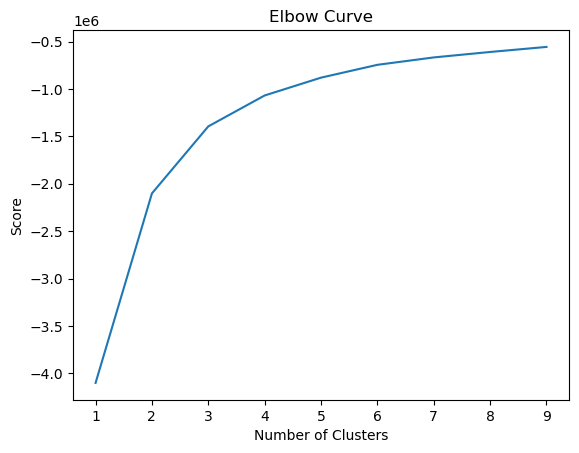

In [21]:
#Plot the elbow curve 
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve starts to flatten out at 4 clusters. So I will use 4 clusters for the k-means algorithm. 

# 4 K-means clustering 

In [22]:
#Create the k-means object 
kmeans = KMeans(n_clusters = 4)

In [23]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [24]:
data['clusters'] = kmeans.fit_predict(data)

In [25]:
data.head()

,teaching,research,citations,Median_Score,clusters
0,99.7,98.7,98.8,98.70,1
1,97.7,98.0,99.9,97.70,1
2,97.8,91.4,99.9,91.40,1
3,98.3,98.1,99.2,98.10,1
4,90.9,95.4,99.9,93.15,1


Text(0, 0.5, 'University Score')

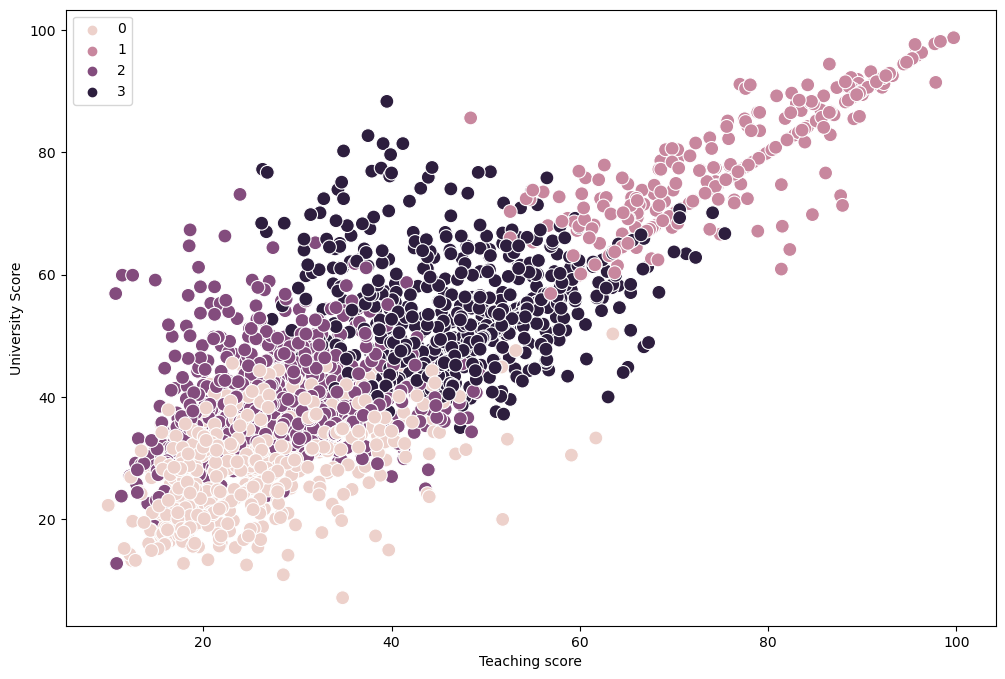

In [26]:
#Plot the Median Score and teaching variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['teaching'], y=data['Median_Score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Teaching score')
plt.ylabel('University Score')

Text(0, 0.5, 'University Score')

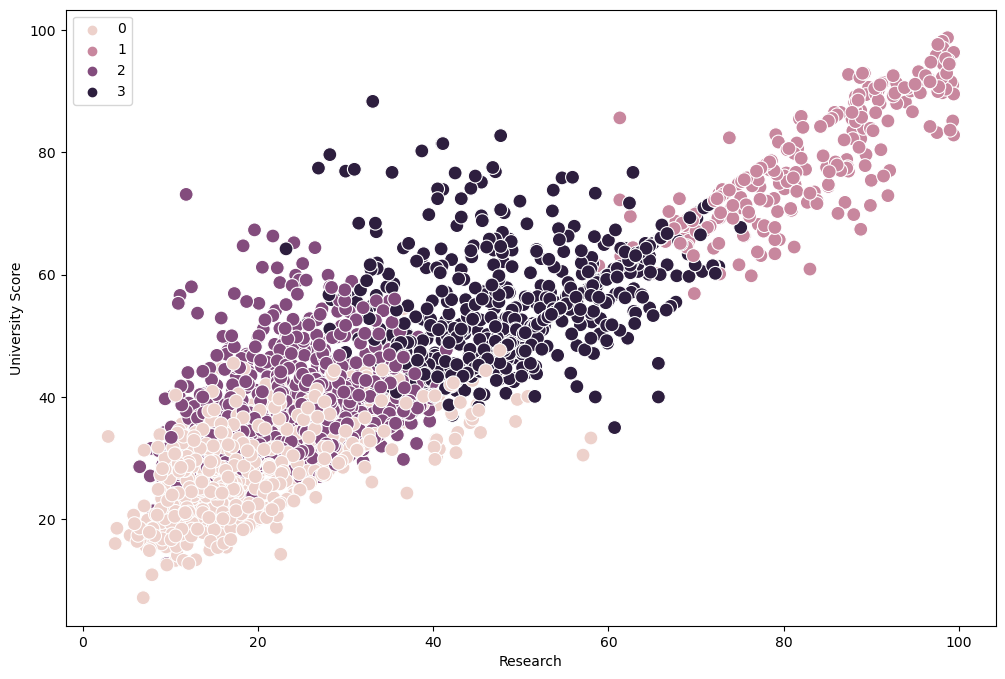

In [27]:
#Plot the Median Score and teaching variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=data['research'], y=data['Median_Score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Research')
plt.ylabel('University Score')

In [32]:
#Create a cluster column for each of the colors
data.loc[data['clusters'] == 2, 'cluster'] = '2 dark purple'
data.loc[data['clusters'] == 1, 'cluster'] = '1 medium purple'
data.loc[data['clusters'] == 0, 'cluster'] = '0 light pink'
data.loc[data['clusters'] == 3, 'cluster'] = '3 black'

In [34]:
#Descriptive stats 
data.groupby('cluster').agg({'teaching':['count','mean', 'median'], 
                          'research':['mean', 'median'],
                          'citations':['mean', 'median'], 
                          'Median_Score':['mean','median']})

teaching                     research         citations  \
                   count       mean median       mean median       mean   
cluster                                                                   
0 light pink         659  26.181487   24.7  20.719727  18.80  30.625948   
1 medium purple      272  75.325368   74.4  81.548897  81.00  87.593382   
2 dark purple        954  28.242872   28.3  24.123166  23.90  66.751677   
3 black              718  46.951950   46.4  48.224652  47.65  70.877437   

                       Median_Score         
                median         mean median  
cluster                                     
0 light pink     31.80    29.090061  29.10  
1 medium purple  92.10    77.675551  75.95  
2 dark purple    64.55    37.726625  36.55  
3 black          72.95    52.968245  51.90

# Export data set with clusters column 

In [26]:
data.shape

(2603, 5)

In [27]:
data.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Times_cluster.csv'))